K-Nearest Neighbors


K-Nearest Neighbors Algorithm is one of the simple, easy-to-implement, and yet 
effective supervised machine learning algorithms.
It is called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset





In [2]:
import random
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')


In [4]:
#creating dataset

x, y = make_blobs(n_samples=100, centers=3, random_state=12, cluster_std=2.3)
x = pd.DataFrame(data=x, columns=['feature1', 'feature2'])
y = pd.DataFrame(data=y, columns=['target'])
data = pd.concat([x, y], axis=1)
data.head()



,feature1,feature2,target
0,-14.155801,6.031806,0
1,-12.481486,7.497387,2
2,-3.696654,-0.800455,1
3,-7.948011,8.309356,2
4,-3.844331,5.533924,0


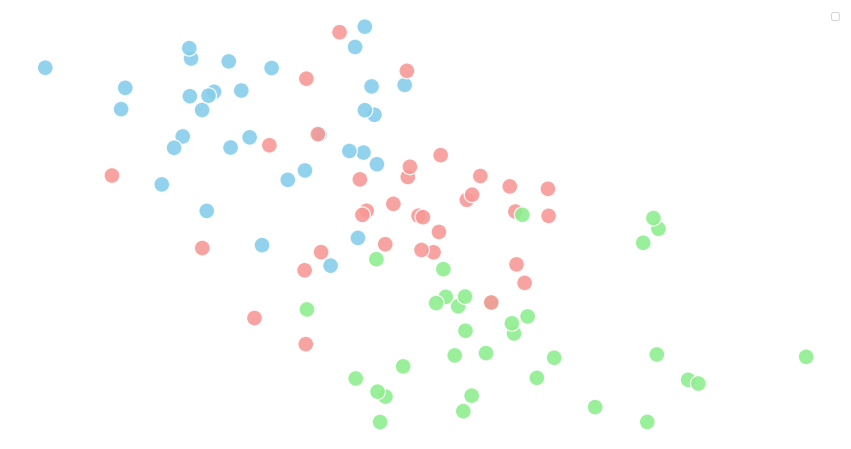

In [6]:
#plotting values
colors = ['r','darkgreen','b','c','m','y']
palette = {0:'#f79a97', 1:'lightgreen', 2:'skyblue', 3:'cyan', 4:'violet', 5:'yellow'}

fig = plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='feature1', y='feature2', hue='target', 
                alpha=0.9, s=250, palette=palette)

ax = fig.get_axes()[0]
ax.set_axis_off()
ax.legend([])
plt.show()

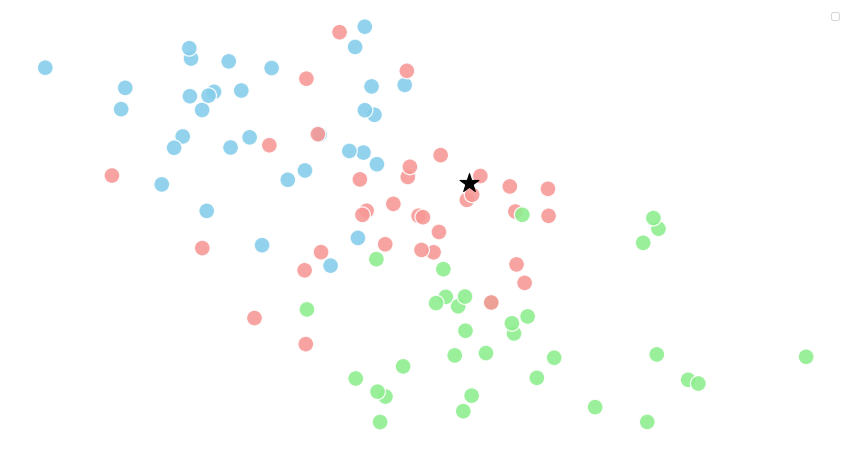

In [7]:
#creating a data point
x1 = random.uniform(data.feature1.min(), data.feature1.max())
x2 = random.uniform(data.feature2.min(), data.feature2.max())

fig = plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x='feature1', y='feature2', hue='target', 
                alpha=0.9, s=250, palette=palette)

plt.scatter(x=x1, y=x2, s=400, marker='*', color='k')
ax = fig.get_axes()[0]
ax.set_axis_off()
ax.legend([])
plt.show()

In [8]:
def knn_algorithm(k):

    euclidean_distance = []
    for i in range(data.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(data.iloc[i].values[:2]-[x1,x2], data.iloc[i].values[:2]-[x1,x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [data.target[i] for i in index]
    label = statistics.mode(label)
    
    fig = plt.figure(figsize=(15,8))
    sns.scatterplot(data=data, x='feature1', y='feature2', hue='target', 
                    alpha=0.9, s=250, palette=palette)

    for i in index:
        plt.scatter(x=data['feature1'][i], y=data['feature2'][i], s=250, alpha=0.6, linewidth=2, edgecolor='k',
                    color=colors[int(data.iloc[i].values[-1])])

    plt.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    plt.title(label = f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax = fig.get_axes()[0]
    ax.set_axis_off()    
    plt.show()
    return f'Predictions: {label}'

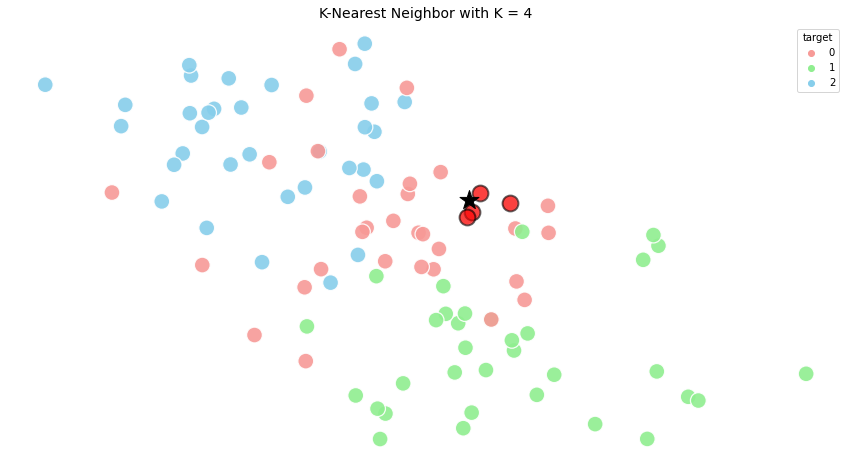

'Predictions: 0'

In [9]:
#Now we can use diffrent K-values
knn_algorithm(4)

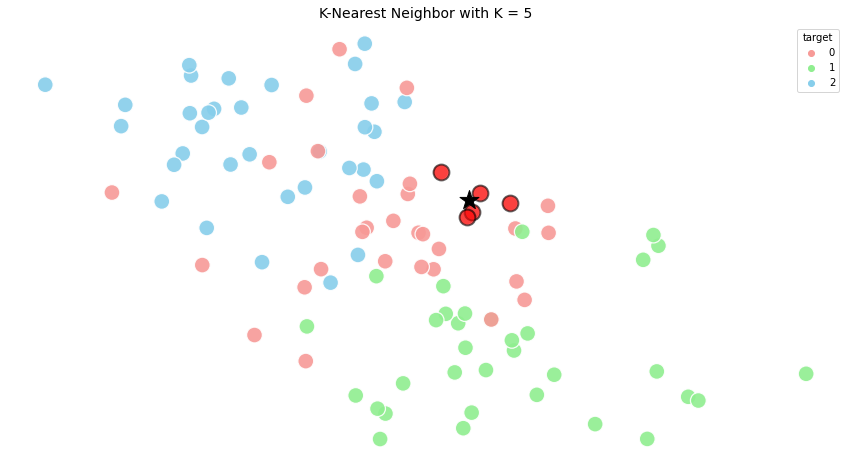

'Predictions: 0'

In [10]:
knn_algorithm(5)

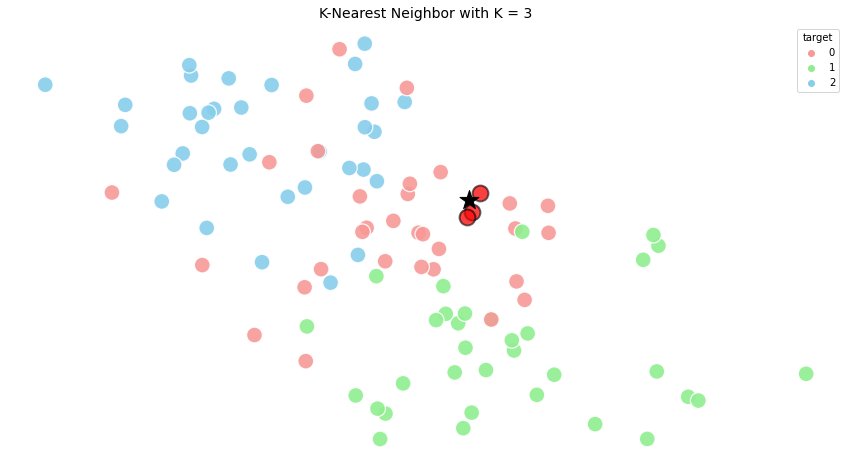

'Predictions: 0'

In [11]:
knn_algorithm(3)